In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from datetime import datetime
print("Done")

Done


In [2]:
T_err = 0.05
h_err = 0.005
data = pd.read_csv("../data/data.csv")
data = data.drop(index=[5])
data["h1"] /= 100
data["h2"] /= 100
data["P"] = (data["h1"] - data["h2"]) * 9.8155 * 13550 - 0.084 * 1000 * 9.8155
data

,T,h1,h2,P
0,293.00,0.05190,0.02580,2646.798653
1,295.00,0.05300,0.02500,2899.498700
2,296.00,0.05345,0.02440,3039.148726
3,297.00,0.05420,0.02360,3245.298765
4,298.00,0.05500,0.02295,3438.148801
6,300.00,0.05645,0.02185,3777.298865
7,301.00,0.05710,0.02110,3963.498900
8,302.00,0.05695,0.02020,4063.248919
9,303.00,0.05880,0.01955,4395.748981
10,304.00,0.05940,0.01880,4575.299015


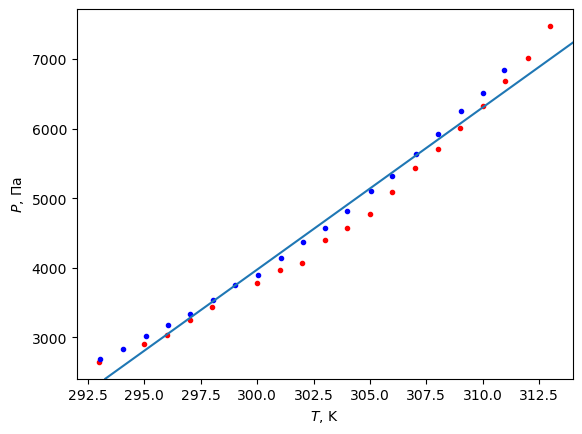

In [7]:
t_hot = data["T"].iloc[:19]
t_cool = data["T"].iloc[19:]
p_hot = data["P"].iloc[:19]
p_cool = data["P"].iloc[19:]
plt.plot(t_hot, p_hot, 'r.')
plt.plot(t_cool, p_cool, 'b.')
p, v = np.polyfit(data["T"], data["P"], 1, cov=True)
a, b = p
a_err, b_err = np.sqrt(v[0][0]), np.sqrt(v[1][1])
plt.axline((295, 295 * a + b), (310, 310 * a + b))
plt.xlabel("$T$, K")
plt.ylabel("$P$, Па")
plt.savefig("plot1.png", dpi=400)

In [8]:
a, a_err

(232.89125022067523, 5.8435972565159915)

In [4]:
L = 8.31 * data["T"].mean() ** 2 / data["P"].mean() * a
L_err = 8.31 * data["T"].mean() ** 2 / data["P"].mean() * a_err
L, L_err, L_err / L * 100

(38272.99404261969, 960.3278902671728, 2.509152770221686)

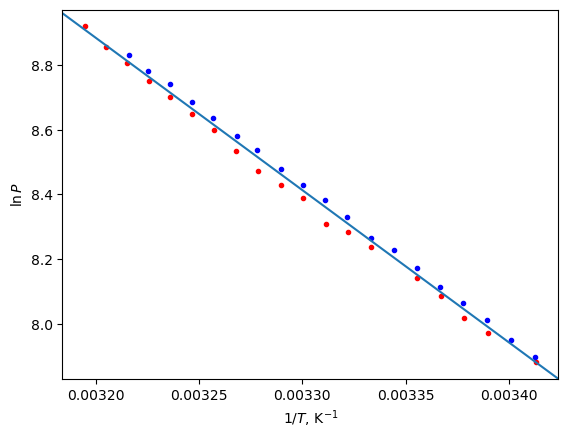

In [9]:
t1_hot = 1 / t_hot
t1_cool = 1 / t_cool
pln_hot = np.log(p_hot)
pln_cool = np.log(p_cool)
plt.plot(t1_hot, pln_hot, 'r.')
plt.plot(t1_cool, pln_cool, 'b.')
p, v = np.polyfit(1/data["T"], np.log(data["P"]), 1, cov=True)
a, b = p
a_err, b_err = np.sqrt(v[0][0]), np.sqrt(v[1][1])
plt.axline((0.0032, 0.0032 * a + b), (0.0034, 0.0034 * a + b))
plt.xlabel("$1/T$, K$^{-1}$")
plt.ylabel("$\ln P$")
plt.savefig("plot2.png", dpi=400)

In [6]:
L2 = -a * 8.31
L2_err = a_err * 8.31
L2, L2_err, L2_err / L2 * 100

(39142.024806776695, 459.63939521134887, 1.174286198734847)

In [10]:
a, a_err

(-4710.231625364223, 55.31159990509613)